# Benchmarking sorting algorithms
The final project assignment for Computational Thinking with Algorithms module, GMIT 2020.

Lecturer: dr Dominic Carr

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie


<figure>
  <img src="https://cdn1.byjus.com/wp-content/uploads/2019/06/Ascending-Order.png" alt="Sorting" style="width:400px">
  <figcaption>Image source: Byjus.com.</figcaption>
</figure>

___
### Content

1. Introduction
2. Sorting algorithms
    1. Bubble Sort
    2. Quicksort
    3. Bucket Sort
    4. Merge Sort
    5. Timsort
3. Benchmarking
    1. About the benchmark
    2. Benchmarking procedure
4. Findings / Discussion
 

___

## 1. Introduction

### What is sorting?

There is a question put on Quora.com on what is sorting. One of the answers is as follows: “It’s the process of arranging all objects within a collection by comparing one or more of it’s attributes (...). The objects must be of the same type since they must have all the attributes in common“ ([Quora - What is sorting?](https://www.quora.com/What-is-sorting-2)). 

According to Comen, “sorting can be defined as a process of arranging every element within the collection (e.g. array) in a certain order, e.g. ascending. Cormen et al. defines sorting as follows: for a sequence of n numbers $(a1, a2, …, an)$ sorting is such a permutation (reordering) of the input sequence that $a1 ≤ a2 ≤ … ≤ an$“  ([T. H. Cormen et. al, 2009](https://web.ist.utl.pt/~fabio.ferreira/material/asa/clrs.pdf)).

Sorting is one of the most fundamental problems of computing. “In the early days of computing, the common wisdom was that up to thirty percent of all computing cycles were spent in sorting” ([El Abbadi & Al Yasseri, 2011](https://www.iasj.net/iasj?func=fulltext&aId=36934)). Although many efficient algorithms have been developed over the time, this research topic remains valid.


### Algorithm complexity

Very important in computer science is the question of performance of algorithms, and more precisely - the rate of growth of the algorithm complexity. As each operation performed by a computer takes up resources, like time or memory, and various algorithms - even leading to the same result - require an unequal amount of the resources. In practical terms, the time needed for an algorithm to complete its task depends on various factors, among others, such as:
the input size,

* the initial state of the input, like elements order,
* number of operations needed,
* processor performance,
* memory allocation (auxiliary variables are held in the memory), etc.


Algorithms analysis is not concerned with external factors such as processing power. In order to eliminate the effect of external determinants, algorithms analysis abstracts them and purely on the algorithm itself. "When trying to characterize an algorithm’s efficiency in terms of execution time, independent of any particular program or computer, it is important to quantify the number of operations or steps that the algorithm will require" ([B. Miller & D. Ranum, 2005](https://runestone.academy/runestone/books/published/pythonds/index.html)).

Consequently, it is relevant to consider algorithms’ efficiency, often described with reference to complexity in terms of time and complexity in terms of space (memory) - how fast would the function grow with linearly increasing input size.

The problem of sorting is of a complex nature. In fact, there are several closely connected concerns relating to it. The concept of algorithms is one of them. Computers operate on sequential tasks, performed one by one. An algorithm is any well-defined computational procedure that takes some value, or set of values, as input and produces some value, or set of values, as output. "An algorithm is thus a sequence of computational steps that transform the input into the output" ([T. H. Cormen et. al, 2009](https://web.ist.utl.pt/~fabio.ferreira/material/asa/clrs.pdf)). For a successful algorithm, the instructions must be clear (unambiguous), definite and leading to a finite result. 


### Big O notation

Algorithms efficiency is usually described using asymptotic analysis, that is approximation of a function that is asymptotically equivalent ([Wikipedia - Asymptotic analysis](https://www.wikipedia.com/en/Asymptotic_analysis)). In algorithms analysis, this property is traditionally denoted with so-called big O notation, meaning the complexity of the algorithm is at most of such a degree ([Wikipedia - Big O notation](https://en.wikipedia.org/wiki/Big_O_notation)). In other words, the function's growth rate is limited from above by such a function, but it may actually grow slower. 

If a running time is $O(f(n))$, the running time is at most $k∙f(n)$. (...) We use big-O notation for asymptotic upper bounds, since it bounds the growth of the running time from above for large enough input sizes. ([Khan Academy - asymptotic notation](https://www.khanacademy.org/computing/computer-science/algorithms#asymptotic-notation))

<figure>
  <img src="https://cdn.kastatic.org/ka-perseus-images/501211c02f4c6765f60f23842450e1151cfd9c89.png" alt="Big O notation">
  <figcaption>Image source: Khan Academy.</figcaption>
</figure>

It is worth noting that there are also other notations used in code analysis, such as Omega, Thata and  others ([O. Kaser, 2017](http://www2.unb.ca/~owen/courses/2383-2018/using-big-theta.pdf)). 

It is often convenient to visualise the relationship between input size and time (or space) on a graph. The curve showing the relationship is then approximated by a mathematical function, and simplified with the most significant part of the function. For example, when the curve is an approximation of the square function, it is denoted as O(n2) and means that for n elements to be sorted, time needed for completion of the algorithm is n2. Below figure and table shows the time complexity for various numbers of elements in the array (n) ([T. H. Cormen et. al, 2009](https://web.ist.utl.pt/~fabio.ferreira/material/asa/clrs.pdf), [D. E. Knuth, 1998](https://en.wikipedia.org/wiki/The_Art_of_Computer_Programming), [R. Sedgewick & K. Wayne, 2011](https://algs4.cs.princeton.edu/home/))

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Comparison_computational_complexity.svg" alt="Big O notation" style="width:400px">
  <figcaption>Image source: Wikipedia.</figcaption>
</figure>

For various input data sizes n (e.g the number of elements in the array) there will be different resource consumption N (e.g. time, memory). 

Time required for completion of a task, such as sorting an array depends greatly on the algorithm complexity. The below table shows the relationship between the number of elements n and the time it would take for the selected efficiencies (reproduced from: https://youtu.be/LKiaoV86iJo?t=2494)

| Array size $n$ | 10 | 20 | 50 | 100 | 200 | 1000 |
| --- | --- | --- | --- | --- | --- | --- |
| $log n$ | 3.32 ns | 4.23 ns | 5.64 ns | 6.64 ns | 7.64 ns | 9.97 ns |
| $n$ | 10 ns | 20 ns | 50 ns | 100 ns | 200 ns | 1 $\mu$s |
| $n log n$ | 33.21 ns | 86.44 ns | 282.2 ns | 664.4 ns | 1.54 $\mu$s | 9.97 $\mu$s |
| $n2$ | 100 ns | 400 ns | 2.5 $\mu$s | 10 $\mu$s | 40 $\mu$s | 1 ms | 2 n | 1 $\mu$s | 1.05 ms |
| $2n$ | 1 $\mu$s | 1.05 ms | 13 days | $4x10^{13}$ years | $5.1x10^{43}$ years | $3.4x10^{284}$ years |
| $n!$ | $3.6$ ms | 77 years | $9.6x10^{44}$ years | $3x10^{141}$ year | $2.5x10^{358}$ years | $1.27x10^{2551}$ years |


It is a valid question to realise that the data to be sorted may be in various states of initial order. It is a less consuming process to sort an array that is almost sorted already. In practice, three scenarios are considered: average, worst, and best case. For this reason, while benchmarking the sorting algorithms, it is vital to use the same arrays. 

<figure>
  <img src="https://miro.medium.com/max/1192/1*ipkeWQ_Lb0lbkhB8rigxTA.png" alt="Big O notation" style="width:596px">
  <figcaption>Image source: Bigocheatsheet.com, Medium.com</figcaption>
</figure>

Sorting algorithms aggregated into two classes: comparison-based sorting and partition-based sorting. In the former the arrangement of the elements is performed on comparing the elements’ value. In the latter, the arrangement is achieved by division. For instance, in the bucket sorting algorithm, all the values are divided into groups - buckets, and the elements are distributed between the groups. "Surprisingly, there are
potentially faster ways to sort elements if you know something about those elements
in advance" ([G. T. Heinemann et al, 2016](https://www.amazon.com/Algorithms-Nutshell-Practical-George-Heineman/dp/1491948922)).

There are several further qualities of sorting algorithms. One of the most important is in-place sorting. It occurs if it requires only a fixed amount of additional, other than the given array, storage space during the sorting process, i.e. O(1). Opposite to this one is out-of-place sorting, which requires extra storage space on top of the given array, and creates another auxiliary array of data while the sorting process continues.

Stable sorting algorithms maintain the order in which elements of the same value (key). This means that if prior to sorting one element of a particular value occurred before the other element of the same value, then after stable sorting this order will be always kept.

Application of data sorting algorithms can be found in numerous instances of computer programs. Very often the overall efficiency of a program depends on the sorting algorithm it uses. It is, therefore, important to understand the concept of algorithms complexity and know that there are different sorting algorithms. This would allow to select the most suitable algorithm for the purpose and to optimise efficiency of the sorting process

___


## 2.1 Bubble Sort

### Algorithm description

Key properties (Wikipedia, FreeCodeCamp):
* Time complexity: $O(n^2)$
* Space complexity: $O(1)$
* Stable: Yes
* In-place: Yes
* Method: Exchanging

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/5/54/Sorting_bubblesort_anim.gif" alt="Bubble Sort" style="width:300px; height:200px">
  <figcaption>Image source: Wikipedia.</figcaption>
</figure>

Bubble sort is considered as one of the conceptually simplest sorting algorithms, but by the expense of time and space complexity, which are respectively O(n2) and O(1) ([Wikipedia - Bubble sort](https://en.wikipedia.org/wiki/Bubble_sort)). 

"The idea is to make repeated passes up the array. On each pass the next lightest value will appear in the proper place. Assuming the array is indexed [0...n-1], we require (n − 1) passes to guarantee that the array is sorted. The bubbling process compares adjacent values and insures that the larger of the two is on top" ([El Abbadi & Al Yasseri, 2011](https://www.iasj.net/iasj?func=fulltext&aId=36934)).

The below figure shows the process of Bubble sort. The steps represent iteration over the array’s elements. In step 1, the first two elements of the array are compared to each other. If the first one is greater than the other, a swap takes place. In other words, the greater element is moved forward. Next, element no.2 and element no.3 are compared, and again the greater is left in the front. Systematically, the greater element of each comparison is pushed forward until it encounters a greater one (and then they swap) or reaches the end of the array. By the time step 1 is over, all elements are compared, the largest element is identified and pushed at its final (sorted) position. In the next step this element is excluded from sorting. In step 2, the same procedure is repeated from the beginning. The array is being sorted iteratively in each step.
<figure>
  <img src="https://he-s3.s3.amazonaws.com/media/uploads/2682167.png" alt="Bubble Sort" style="width:740px">
  <figcaption>Image source: Hackerearth.com</figcaption>
</figure>


### Algorithm implementation

In [1]:
######################################
#   Bubble Sort                      
######################################

##### Credits #####
# Source: https://stackabuse.com/sorting-algorithms-in-python/
# Adapted and commented by the author of this Notebook

##### Function definition #####
# Function performing the bubble sort; it takes an arrey to be sorted as an argument
def bubble_sort(array):
    
    # Variable swapped is initially set to True, so that the loop runs at least once
    swapped = True
    
    while swapped:
        
        swapped = False
        
        # loop through each element of the array
        for i in range(len(array) - 1):
            
            # compare current (i-th) element with the next one
            
            if array[i] > array[i + 1]:
                
                # when the above condition is satisfied, swap the elements
                array[i], array[i + 1] = array[i + 1], array[i]
                
                # Set the swapped to True so it will loop again
                swapped = True


In [2]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)

bubble_sort(random_list_of_nums)
print("After:",random_list_of_nums)

Before: [2, 7, 1, 8, 4, 1]
After: [1, 1, 2, 4, 7, 8]


## 2.2 Quicksort

### Algorithm description

Key properties (Wikipedia):
* Time complexity: $O(n^2)$
* Space complexity: $O(logn)$
* Stable: No
* In-place: Yes
* Method: Partitioning

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif" alt="Quicksort" style="width:300px; height:200px">
  <figcaption>Image source: Wikipedia.</figcaption>
</figure>

Quicksort is a highly efficient sorting algorithm. It is an example of a divide and conquer method. "Quicksort sorts a list effectively by dividing the list into smaller and smaller lists, and sorting the smaller lists in turn" ([A.C. Dalal,  2004](http://www.cs.carleton.edu/faculty/adalal/teaching/f04/117/notes/searchSort.pdf)). The procedure is repeated recursively ([El Abbadi & Al Yasseri, 2011](https://www.iasj.net/iasj?func=fulltext&aId=36934)). This is an in-place algorithm and is not stable.

The basic idea behind quicksort is this: Specify one element in the list as a “pivot” point. Then, go through all of the elements in the list, swapping items that are on the “wrong” side of the pivot. In other words, swap items that are smaller than the pivot but on the right side of the pivot with items that are larger than the pivot but on the left side of the pivot. Once you’ve done all possible swaps, move the pivot to wherever it belongs in the list. Now we can ignore the pivot, since it’s in position, and repeat the process for the two halves of the list (on each side of the pivot). We repeat this until all of the items in the list have been sorted ([A.C. Dalal, 2004](http://www.cs.carleton.edu/faculty/adalal/teaching/f04/117/notes/searchSort.pdf)).

<figure>
  <img src="https://algs4.cs.princeton.edu/23quicksort/images/quicksort-overview.png" alt="Quicksort">
  <figcaption>Image source: https://algs4.cs.princeton.edu/23quicksort/</figcaption>
</figure>


Quicksort is a divide-and-conquer method for sorting. It works by partitioning an array into two parts, then sorting the parts independently. "The crux of the method is the partitioning process, which rearranges the array to make the following three conditions hold:
* The entry a[j] is in its final place in the array, for some j.
* No entry in a[lo] through a[j-1] is greater than a[j].
* No entry in a[j+1] through a[hi] is less than a[j].

We achieve a complete sort by partitioning, then recursively applying the method to the subarrays" ([R. Sedgewick, K. Wayne, 2011](https://algs4.cs.princeton.edu/home/)).

<figure>
  <img src="https://algs4.cs.princeton.edu/23quicksort/images/partitioning-overview.png" alt="Quicksort">
  <figcaption>Image source: https://algs4.cs.princeton.edu/23quicksort/</figcaption>
</figure>


The process of the Quicksort is illustrated in the below figure.
<figure>
  <img src="https://algs4.cs.princeton.edu/23quicksort/images/quicksort.png" alt="Quicksort">
  <figcaption>Image source: https://algs4.cs.princeton.edu/23quicksort/</figcaption>
</figure>

### Algorithm implementation

In [3]:
######################################
#   Quicksort                      
######################################

##### Credits #####
# Source: https://youtu.be/u4tVQszsyEQ
# Adapted and commented by the author of this Notebook


##### Function definition #####
# Function performing the quick sort; it takes an array to be sorted as an argument
def sortowanie_szybkie(array):
    
    # creation of empty lists
    mniejsze = [] # less than the pivot
    rowne = [] # equal to the pivot
    wieksze =[] # greater than the pivot
    
    # base case of the recursion 
    # check whether the array is more than one element long (otherwise, one-element list is considered to be sorted)
    if len(array) <= 1:
        return array
    
    # recursion case, when the array contains more than one element
    else: 
        # set the pivot value at the middle element of the list
        middle = (len(array))//2
        pivot = array[middle]
        
        # let's consider three cases for each element of the list
        for x in array:
            
            # case #1 - the current element is greater than the pivot
            if x > pivot:
                wieksze.append(x) # add the current element to the list "wieksze"
                
            # case #2 - the current element is equal to the pivot
            elif x == pivot:
                rowne.append(x) # add the current element to the list "rowne"
                
            # case #3 - the current element is less than the pivot
            else:
                mniejsze.append(x) # add the current element to the list "mniejsze"
        
        # as a result of the above loop, the function will return:
        # in the middle: the element(s) that has just been sorted, i.e. equal to the pivot (as well as those sorted on previous recurses)
        # on the left-hand side: elements that are less than the pivot - still unsorted, therefore the same function is called recursively (with the "mniejsze" list as an argument)
        # on the the right-hand side: elements that are greater than the pivot - still unsorted, therefore the same function is called recursively (with the "wieksze" list as an argument)
        
        return sortowanie_szybkie(mniejsze) + rowne + sortowanie_szybkie(wieksze)
        

In [4]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
print("After:",sortowanie_szybkie(random_list_of_nums))

Before: [2, 7, 1, 8, 4, 1]
After: [1, 1, 2, 4, 7, 8]


## 2.3 Bucket Sort

### Algorithm description

Key properties (Wikipedia):
* Time complexity: $O(n^2)$
* Space complexity: $O(nk)$
* Stable: Yes
* In-place: No
* Method: Partitioning

Bucket Sort is an example of a non-comparison class algorithm. It is particularly useful when sorting relatively uniformly distributed elements in the array. When the input is drawn from a uniform distribution, bucket sort runs in linear time ([T. H. Cormen et. al, 2009](https://web.ist.utl.pt/~fabio.ferreira/material/asa/clrs.pdf))

The idea of the bucket sorting algorithm is as follows. First the given range of elements is divided into k sub-intervals (buckets) of the same size and desired sequence. Then, the elements are assigned to the appropriate buckets. For uniformly distributed elements in the array (which is a presumed condition), each bucket would receive a similar - and relatively small - number of the elements. After that, elements inside the buckets are sorted, typically using Insert Sort. Finally, the content of the buckets are put together (append) while maintaining the already arranged sequence.

It is also possible to sort the content of the buckets by recursively calling the Bucket sort algorithm ([Programing-algorithms.net - Bucket sort](http://www.programming-algorithms.net/article/41160/Bucket-sort)).

The below figure shows the idea of the Bucket sort process.

<figure>
  <img src="https://cdn.programiz.com/sites/tutorial2program/files/Bucket_2.png" alt="Bucket Sort" style="width:500px">
  <figcaption>Image source: https://www.programiz.com/dsa/bucket-sort</figcaption>
</figure>

### Algorithm implementation

In [5]:
######################################
#   Bucket Sort                      
######################################

##### Credits #####
# Own implementation, developed based on pseudocode from https://youtu.be/geVyIsFpxUs
# Adapted and commented by the author of this Notebook

# Auxiliary function that sorts the content of each bucket, using the insert sort
# Adapted from: https://www.geeksforgeeks.org/bucket-sort-2/

# the function takes one argument, a list
def insertSort(list): 
    
    # loop through all elements of the list
    for i in range(1, len(list)): 
        #temorary variable 
        j = i-1 # j is equal to the previous iteration number
        
        # inner loop - executed as long as two conditions are satisfied
        while list[j] > list[i] and j >= 0:  # compare the current and the previous element and the index of the previous element is not-negative
            list[j+1] = list[j] # swap  
            j -= 1 # decrementation
            
        list[j+1] = list[i] # move to the next element
        
    return list   
        

##### Function definition #####

# import required external libraries
import math # will be needed for ceil() method

# define the function, which takes as an argument the array to be sorted
def bucket_sort(array):

    #print("Original list:", arr) # for testing
    
    # number of buckets
    n_buckets = 6 # assumed arbitrarily

    # create an empty array of buckets, where each bucket is also an empty array
    bucket = []
    for i in range(n_buckets):
        bucket.append([])
        
    # define a divider which will be used for sorting;
    # divider is the value of the maximum element of the array to be sorted divided by number of buckets
    divider = math.ceil((max(array)+1)/n_buckets)
    # divider = 10 # alternatively to the above line, it can be just assumed arbitrarily

    
    # sorting the array's element into the buckets (unsorted)
    # loop through the array
    for i in array:
        
        # determine into which bucket index will fall each element of the arrey
        j = i//divider
        # put the current i-element of the array to the corresponding bucket
        bucket[j].append(i)
    
    # for testing 
    #print("Sorted unto the buckets:", bucket) # for testing
        
    # put sorted content of each bucket into a single array (concatenate single buckets)
    # adopted from https://gist.github.com/sahid/5022081
    sorted_result = []
    for i in range(n_buckets):
        
        # adding the sorted content of each bucket to the resulting array, 
        # using the insertSort() function iteratively for each bucket
        sorted_result += insertSort(bucket[i])
        
    return sorted_result 


In [6]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
print("After:",bucket_sort(random_list_of_nums))

Before: [2, 7, 1, 8, 4, 1]
After: [1, 1, 2, 4, 7, 8]


## 2.4 Merge Sort

### Algorithm description

Key properties (Wikipedia):
* Time complexity: $O(n logn)$
* Space complexity: $O(n)$
* Stable: Yes
* In-place: No
* Method: Merging

Merge Sort is another highly efficient algorithm. Like the Quicksort algorithm, it also relies on ‘divide and conquer’ strategy, but applies a different approach. It is considered as "a neat algorithm, because it’s the sort that sorts itself” ([A. C. Dalal, 2004](http://www.cs.carleton.edu/faculty/adalal/teaching/f04/117/notes/searchSort.pdf)). According to Wolfram MathWorld, the algorithm was first proposed by John von Neumann in 1945. 


The main idea behind the algorithm is that two ordered lists are merged together into a single list ([D.E. Knuth, 1998](https://en.wikipedia.org/wiki/The_Art_of_Computer_Programming)). "Merge sort starts by dividing the list to be sorted in half. Then, it divides each of these halves in half. The algorithm repeats until all of these “sublists” have exactly one element in them. At that point, each sublist is sorted. In the next phase of the algorithm, the sublists are gradually merged back together (hence the name), until we get our original list back - sorted, of course" ([A. C. Dalal, 2004](http://www.cs.carleton.edu/faculty/adalal/teaching/f04/117/notes/searchSort.pdf)).

"While comparing two sublists for merging, the first element of both lists is taken into consideration. While sorting in ascending order, the element that is of a lesser value becomes a new element of the sorted list. This procedure is repeated until both the smaller sublists are empty and the new combined sublist comprises all the elements of both the sublists" ([Hackerearth.com](https://www.hackerearth.com/practice/algorithms/sorting/)).

<figure>
  <img src="https://www.101computing.net/wp/wp-content/uploads/Merge-Sort-Algorithm.png" alt="Bubble Sort" style="width:640px">
  <figcaption>Image source: https://www.101computing.net/merge-sort-algorithm/</figcaption>
</figure>

Below is the algorithm process visualisation taken from Princeton University lectures materials.

<figure>
  <img src="https://algs4.cs.princeton.edu/22mergesort/images/mergesortTD.png" alt="Bubble Sort">
  <figcaption>Image source: https://algs4.cs.princeton.edu/22mergesort/</figcaption>
</figure>

### Algorithm implementation

In [7]:
######################################
#   Merge Sort                      
######################################

##### Credits #####
# Source: https://stackabuse.com/sorting-algorithms-in-python/
# Adapted and commented by the author of this Notebook


# Auxiliary function, merging and sorting two arrays
def merge(left_list, right_list):
    sorted_list = []
    left_list_index = right_list_index = 0

    # We use the list lengths often, so its handy to make variables
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        
        if left_list_index < left_list_length and right_list_index < right_list_length:
            
            # We check which value from the start of each list is smaller
            # If the item at the beginning of the left list is smaller, add it to the sorted list
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
                
            # If the item at the beginning of the right list is smaller, add it to the sorted list
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # If we've reached the end of the of the left list, add the element from the right list
        elif left_list_index == left_list_length:
            
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
            
        # If we've reached the end of the of the right list, add the elements from the left list
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    # final result of the sorting
    return sorted_list


##### Function definition #####
# Function performing the merge sort; it takes an array to be sorted as an argument
def merge_sort(array):
    
    # If the list is a single element, return it
    if len(array) <= 1:
        return array

    # Use floor division to get midpoint, indices must be integers
    mid = len(array) // 2

    # Sort and merge each half
    left_list = merge_sort(array[:mid])
    right_list = merge_sort(array[mid:])

    # Merge the sorted lists into a new one
    return merge(left_list, right_list)


In [8]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
print("After:",merge_sort(random_list_of_nums))

Before: [2, 7, 1, 8, 4, 1]
After: [1, 1, 2, 4, 7, 8]


## 2.5 Timsort

### Algorithm description

Key properties (Wikipedia):
* Time complexity: $O(n logn)$
* Space complexity: $O(n)$
* Stable: Yes
* In-place: No
* Method: Insertion and merging

Timsort is a relatively recent sorting algorithm, implemented by Tim Peters in 2002. It is an example of a hybrid sorting algorithm, combining Merge sort and Insertion sort in order to optimise the overall performance. The algorithm is characterised by its adaptive and stable properties ([bugs.python.org](https://bugs.python.org/file4451/timsort.txt)).

The algorithm has replaced the Quick sort in some major programming languages (e.g. Python, Java), It is particularly suited to almost sorted inputs that exist in most real-world data ([Wikipedia, Timsort](https://en.wikipedia.org/wiki/Timsort)). Its time complexity is described as O(n logn) ([N. Auger et. al, 2018](https://drops.dagstuhl.de/opus/volltexte/2018/9467/pdf/LIPIcs-ESA-2018-4.pdf))

"In a nutshell, the main routine marches over the array once, left to right, alternately identifying the next run, then merging it into the previous runs "intelligently". Everything else is complication for speed, and some hard-won measure of memory efficiency" ([bugs.python.org](https://bugs.python.org/file4451/timsort.txt)).

The algorithm divides the array into segments called runs, typically of size 32 to 64.
"In a dataset, a natural run is a state of the array wherein at least two consecutive elements are currently (relative to the array’s global and local states) in either ascending or descending order. Should the two elements not be in correct ascending order, they are simply reversed in place. Timsort makes a first-pass across the array in search of such runs, while concurrently seeking to identify a minrun, or the minimum size of an ordered list within the list" ([Medium, The case for Timsort](https://medium.com/@rscheiwe/the-case-for-timsort-349d5ce1e414))

<figure>
  <img src="https://miro.medium.com/max/1400/0*9J7j17iPNp3E04iR.png" alt="Bubble Sort" style="width:500px">
  <figcaption>Image source:https://medium.com/@rscheiwe/the-case-for-timsort-349d5ce1e414</figcaption>
</figure>

If a run is smaller than this minimum run size, insertion sort is used to add more elements to the run until the minimum run size is reached ([Wikipedia - Timsort](https://en.wikipedia.org/wiki/Timsort)). 

"If, say, the minrun is equal to or less than 64 elements, Timsort knows to reduce itself to Binary Insertion sort, which guarantees the implementation of merging only in cases where the “weight” of a minrun is too much (e.g., cases where merging cannot be efficiently implemented because the number of minruns is greater than the power of two). In such cases where the array is greater than 64 elements, the first-pass natural-run search determines said natural runs for the sake of merging. It is ideal to delay merging until the optimized time, given the fact that an array may not be fully reduced to its set of runs without the algorithms “knowledge” of exclusive or excluded elements, not to mention the array’s size" ([Medium, The case for Timsort](https://medium.com/@rscheiwe/the-case-for-timsort-349d5ce1e414)).

These segments are then sorted using insertion sort and merged together, forming finally the sorted array.

<figure>
  <img src="https://corte.si/posts/code/timsort/64r-tim.png" alt="Bubble Sort" style="width:700px">
  <figcaption>Image source:https://corte.si/posts/code/timsort/index.html</figcaption>
</figure>


This algorithm is similar to Merge sort, but was designed to take advantage of runs of consecutive ordered elements that already exist in most real-world data. "The advantage of merging ordered runs instead of merging fixed size sub-lists (as done by traditional mergesort) is that it decreases the total number of comparisons needed to sort the entire list" ([Wikipedia - Timsort](https://en.wikipedia.org/wiki/Timsort)).

Timsort utilises a concept of ‘galloping’, which enhances the merging process.
"In galloping mode, Timsort takes two runs (called “sub-runs”, say X and Y) and checks, via binary search, if Y[0] could fit into X. If so, the entirety of the run is placed at the found position given the fact that the two runs are accordingly sorted due to the created of runs in Timsort’s previous step(s). Should Y[0] not fit in to Xat Y[0], then the process is reversed and Timsort attempts to insert X[0] into Y" ([Medium. com - The case for Timsort](https://medium.com/@rscheiwe/the-case-for-timsort-349d5ce1e414)).


<figure>
  <img src="https://miro.medium.com/max/1024/0*tQAmlZPVcmcYLKaX.png" alt="Bubble Sort" style="width:500px">
  <figcaption>Image source:https://medium.com/@rscheiwe/the-case-for-timsort-349d5ce1e414</figcaption>
</figure>

Timsort is now commonly commented as the most efficient sorting algorithm currently available for real-life data ([Medium.com](https://medium.com/@george.seif94/this-is-the-fastest-sorting-algorithm-ever-b5cee86b559c), [Hackernoon.com](https://hackernoon.com/timsort-the-fastest-sorting-algorithm-youve-never-heard-of-36b28417f399)).

### Algorithm implementation

In [9]:
######################################
#   Timsort                      
######################################

##### Credits #####
# Source: https://quinston.com/code-snippets/
# Adapted and commented by the author of this Notebook


# Auxiliary function that sorts the content of each run, using the insert sort algorithm
# Function InsertionSort() takes one argument - an array
def InsertionSort(array):

    # loop through all elements of the array
    for x in range (1, len(array)):
       
        # inner loop
        for i in range(x, 0, -1): # decrementation
           
            # compare current and the next (because decrementation) element
            if array[i] < array[i - 1]:
                # swap the values if condition satisfied
                array[i], array[i - 1] = array[i - 1], array[i]
                
            else:
                break
                
            # decrementation
            i = i - 1
            
    return array


# Merge Sort implementation
# The Merge() function takes two arguments - two arrays - and merge them together. The function returns yet another array
def Merge(aArr, bArr):
    
    a = 0 # a is a pointer (index position) of aArr array
    b = 0 # b is a pointer of bArr array
    
    # placeholder - an empty array cArr which will be holding sorted values of aArr and bArr arrays
    cArr = []

    # end of loop codition:
    while a < len(aArr) and b < len(bArr):
        # check if a-element of array aArr is less than b-element of array bArr
        if aArr[a] < bArr[b]:
            cArr.append(aArr[a]) # if the condition is satisfied, assign the value of a-element to cArr array
            a = a + 1 # move the pointer to the next aArr array index
            
        elif aArr[a] > bArr[b]:
            cArr.append(bArr[b])
            b = b + 1
        
        # in case the a-element of aArra and b-element of bArr are equal
        else:
            cArr.append(aArr[a])
            cArr.append(bArr[b])
            a = a + 1
            b = b + 1
    
    # when there are no left elements from bArr to compare with aArr, the remaining elements from aArr are appended at the end of cArr array
    while a < len(aArr):
        cArr.append(aArr[a])
        a = a + 1

    while b < len(bArr):
        cArr.append(bArr[b])
        b = b + 1

    # function returns merged the two arrays, sorted
    return cArr


##### Function definition #####
# Implementation of the TimSort sorting algorithm, with an array to be sorted as an argument.
# Funtion TimSort divides the array to be sorted (arr) into smaller chunks of size RUN.
# The variable RUN is defined outside the funtion body, prior to its first call.
def TimSort(array):

    # chunk size - the array will be splitted into this size of chunks, usually the chunk size is between 32 and 64
    RUN = 32   
    
    # divide the array into chunks
    for x in range(0, len(array), RUN): # loop starting from index 0, to the last element of the array, with incrementing step size RUN; note the value of len(arr) is excluded from the loop
        # arr[x: x+RUN] is the current slice of the array (from x to x+RUN)
        # values of the current array slice are transfered (passed) to InsertionSort function; the return from the InsertionSort is already sorted array assigned to the original slice
        array[x: x+RUN] = InsertionSort(array[x: x+RUN])
    
    
    # merging the already sortd slices of the array
    # create an auxiliary variable     
    RUNinc = RUN
    # define loop termination condition
    while RUNinc < len(array):
        
        # the array is divided into pairs of neighbouring slices and passed to Merge() function
        for x in range(0, len(array), 2 * RUNinc):
            # the return from the Merge() function is assigned to the slice (size of 2xRUN) original array
            array[x: x+2 * RUNinc] = Merge(array[x: x+RUNinc], array[x+RUNinc: x+2*RUNinc])
        
        # incrementation for the while loop
        RUNinc = RUNinc*2

    return array


In [10]:
# Verify the algorithm works
random_list_of_nums = [2, 7, 1, 8, 4, 1]
print("Before:",random_list_of_nums)
TimSort(random_list_of_nums)
print("After:",random_list_of_nums)

Before: [2, 7, 1, 8, 4, 1]
After: [1, 1, 2, 4, 7, 8]


____
## 3.1 About the benchmark

### Algorithms selection

The five sorting algorithms are selected according to the following criteria:

1. A simple comparison-based sort - I have chosen to analyse the **Bubble Sort**
2. An efficient comparison-based sort - **Quicksort**
3. A non-comparison sort - **Bucket Sort** 

The remaining two algorithms were left to my choice:

4. Another efficient sort - **Merge Sort**
5. A hybrid sort - **Timsort** 

Additionally, for comparison, the Python's built-in sorting algorithm - **sorted()** method has been also benchmarked.

Each of the five selected algorithms are briefly described followed by the algorithms implementation in Python and benchmarked. The benchmarking is about running the sorting algorithms for various input size random numbers arrays and measuring the time it takes to run. 

Finally, at the end of the report, the results of the benchmarking process are discussed and key findings presented.


### The benchmark conditions

This project is about assessment of the time complexity of the selected sorting algorithms, or more accurately - their actual implementations. This means measuring the time required for execution, and comparison to each other as well as to the results found in the literature. 

In the benchmark, arrays of randomly generated integers with different input sizes $n$ are used. A variety of different input sizes were selected, as per project brief, i.e. $n$=100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000 to test the effect of the input size on the running time of each algorithm. The arrays consist of integer numbers randomly generated in a range from 0 to 99.

Even though the selected sorting algorithms are well known, the tests are subject to numerous factors affecting the timing, and resulting in potential deviation from their expected performances presented in the literature. These factors include among others the array size, the array pre-sorting arrangement, actual algorithms implementation, processor performance, or other processes being performed while executing the sorting algorithm.

In order to make the benchmarking more accurate, each test will be repeated ten times and the average of the measured times will be considered in the benchmark. Additionally, for the sake of the test credibility, each run for each algorithm and array size is repeated ten times, and the average result taken into analysis.

Furthermore, as the elements of the arrays are randomised, there is a risk that the arrays would be in various degrees pre-sorted, which may lead to uneven sorting cases. In order to eliminate this, the same arrays’ values (for given array size) were used (by cloning) for each sorting algorithm and each of ten runs within the test. Exactly the same arrays will be used for timing the sorting algorithms, in order to increase the credibility of the benchmarking.

## 3.2 Benchmark procedure


The execution times for each algorithm and size of the array being sorted is recorded and stored in a a form of a data table. The dataset is organised into columns corresponding to the sorting algorithms, and rows, representing the size of the array. The type of the dataset is Pandas' _DataFrame_, and is assigned to the variable named `data`.

Below I am creating an empty dataset with the following headings only. Subsequently, the value of time for each algorithm and array size will be added to the dataset.

* `Size` - the size of the array, 
* `Bubble` - Bubble sort algorithm,
* `Quick` - Quicksort,
* `Bucket` - Bucket sort,
* `Merge` - Merge sort,
* `Tim` - Timsort,
* `Python` - Python's built in method sorted() - for comparison.

Getting times and collation the results into the dataframe. Each test is run `num_runs` times and the average time is then put into the dataset.


In [11]:
#  external Python libraries for building and analysing the dataset.
import numpy as np # numerical calculations
import pandas as pd # data manipulation
import time # time stamps


# creation of empty data (just headings)
data = pd.DataFrame(columns = ["Size", "Bubble", "Quick", "Bucket", "Merge", "Tim", "Python"]) 


# adding values of the size column to the dataset, assumed arbitrarily, based on the project brief.
data["Size"] = (100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000)


# a smaller input sizes for visual inspection and testing purposes
#data["Size"] = (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)

### Generating random data arrays 

For each of the array size is populated with randomly generated integer numbers in a range from 0 to 99. 

For each of the selected array sizes, ten different arrays will be generated and stored for the analysis. Exactly the same arrays (clones) will be used for timing the sorting algorithms.

In [12]:
# generating arrays of random numbers

# based on algorithm provided in the project brief
def random_array(size): 
    
    # create an empty array
    array = []
    
    # populate the arr list with randomly generated numbers
    for i in range(size):
        array.append(np.random.randint(0, 100)) # random integer numbers in range from 0 to 99
        
    return array


# generation of arrays for each test sizes

# create an empty container to hold the set of arrays
random_number_arrays = []

# loop through array sizes and for each one assign rundom numbers for each array size (array size is shown in "data" DataFrame, column "size")
for array_size in data["Size"]:
    
    # create an auxiliary counter representing the index 
    random_number_arrays_index = 0
    
    # call function random_array(), passing as an argument the number of elements to be generated
    random_number_arrays.append(random_array(array_size))
    
    # increment the counter by 1
    random_number_arrays_index += 1

In [13]:
# for testing only, show existing arrays, their sizes and first few elements
'''
for i in range(len(data["Size"])):
    print("\nArray #", i+1, "\tSize:  ", len(random_number_arrays[i]))
    for j in range(len(random_number_arrays[i])):
        if j<5: # print out first 5 elements of the array
            print(j, "\t", random_number_arrays[i][j])
'''

'\nfor i in range(len(data["Size"])):\n    print("\nArray #", i+1, "\tSize:  ", len(random_number_arrays[i]))\n    for j in range(len(random_number_arrays[i])):\n        if j<5: # print out first 5 elements of the array\n            print(j, "\t", random_number_arrays[i][j])\n'

#### Bubble Sort

In [14]:
#######################################
#   Bubble Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])//2): # Note: only half of the input sizes are tested for this sorting algorithm
    
    # for testing - show which array is being processed and its number of elements
    #print("Array #\t", current_array+1, "\tSize:", data.loc[(current_array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
        # for testing - array before sorting
        #t1 = []
        #for j in range(10): # show only 10 first elements of the array
        #    t1.append(ar[j])
        #print("\tFirst 10 elements before sorting:\t", t1)
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ##### call the sorting implementation to be benchmarked #####
        bubble_sort(ar)
        
         
        # for testing - array after sorting
        #t2 = []
        #for j in range(10): #  10 first elements 
        #    t2.append(ar[j])
        #print("\tFirst 10 elements after sorting:\t", t2)
                
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for testing - show time of each run
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    # for testing - show average time for all analysed array sizes
    #print("Array size", data.loc[(current_array),"Size"], "   \tAverage time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[current_array, "Bubble"] = average_result

#### Quicksort benchmark

In [15]:
#######################################
#   Quicksort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # for testing - show which array is being processed and its number of elements
    #print("Array #\t", current_array+1, "\tSize:", data.loc[(current_array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
   
        # for testing - array before sorting
        #t1 = []
        #for j in range(10): # show only 10 first elements of the array
        #    t1.append(ar[j])
        #print("\tFirst 10 elements before sorting:\t", t1)
        
        # log the start time (time stamp)
        start_time = time.time()
    
        ##### call the sorting implementation to be benchmarked #####
        sortowanie_szybkie(ar)
        
        
        # for testing - array after sorting
        #t2 = []
        #for j in range(10): #  10 first elements 
        #    t2.append(ar[j])
        #print("\tFirst 10 elements after sorting:\t", t2)
         
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for testing - show time of each run
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    # for testing - show average time for all analysed array sizes
    #print("Array size", data.loc[(current_array),"Size"], "   \tAverage time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[current_array, "Quick"] = average_result
    

#### Bucket Sort benchmark

In [16]:
#######################################
#   Bucket Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): # Note: the last three arrays  tested for this sorting algorithm
    
    # for testing - show which array is being processed and its number of elements
    #print("Array #\t", current_array+1, "\tSize:", data.loc[(current_array),"Size"])
        
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
        # for testing - array before sorting
        #t1 = []
        #for j in range(10): # show only 10 first elements of the array
        #    t1.append(ar[j])
        #print("\tFirst 10 elements before sorting:\t", t1)
        
        # log the start time (time stamp)
        start_time = time.time()
    
        
        ##### call the sorting implementation to be benchmarked #####
        bucket_sort(ar)
        
        
        # for testing - array after sorting
        #t2 = []
        #for j in range(10): #  10 first elements 
        #    t2.append(ar[j])
        #print("\tFirst 10 elements after sorting:\t", t2)
         
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for testing - show time of each run
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed) 
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    # for testing - show average time for all analysed array sizes
    #print("Array size", data.loc[(current_array),"Size"], "   \tAverage time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[current_array, "Bucket"] = average_result

#### Merge Sort benchmark

In [17]:
#######################################
#   Merge Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # for testing - show which array is being processed and its number of elements
    #print("Array #\t", current_array+1, "\tSize:", data.loc[(current_array),"Size"])
        
    # a placeholder to store results for each test
    intermediate_results = []
    
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
        # for testing - array before sorting
        #t1 = []
        #for j in range(10): # show only 10 first elements of the array
        #    t1.append(ar[j])
        #print("\tFirst 10 elements before sorting:\t", t1)
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ##### call the sorting implementation to be benchmarked #####
        merge_sort(ar)
        
        
        # for testing - array after sorting
        #t2 = []
        #for j in range(10): #  10 first elements 
        #    t2.append(ar[j])
        #print("\tFirst 10 elements after sorting:\t", t2)
          
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for testing - show time of each run
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    # for testing - show average time for all analysed array sizes
    #print("Array size", data.loc[(current_array),"Size"], "   \tAverage time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[current_array, "Merge"] = average_result

#### TimSort benchmark

In [18]:
#######################################
#   Tim Sort Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # for testing - show which array is being processed and its number of elements
    #print("Array #\t", current_array+1, "\tSize:", data.loc[(current_array),"Size"])
    
    # a placeholder to store results for each test
    intermediate_results = []

    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
    
        
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
        
        # for testing - array before sorting
        #t1 = []
        #for j in range(10): # show only 10 first elements of the array
        #    t1.append(ar[j])
        #print("\tFirst 10 elements before sorting:\t", t1)
        
        # log the start time (time stamp)
        start_time = time.time()
    
    
        ##### call the sorting implementation to be benchmarked #####
        TimSort(ar)
        
        
        # for testing - array after sorting
        #t2 = []
        #for j in range(10): #  10 first elements 
        #    t2.append(ar[j])
        #print("\tFirst 10 elements after sorting:\t", t2)
        
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for testing - show time of each run
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    # for testing - show average time for all analysed array sizes
    #print("Array size", data.loc[(current_array),"Size"], "   \tAverage time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[current_array, "Tim"] = average_result

#### Python built-in sortied() function benchmark

In [19]:
#######################################
#   Python built-in sorted() Benachmark                      
#######################################

# loop through each array size defined in the data["Size"] column, that is arrays of quantity of elements 100, 250, 500, etc
for current_array in range(len(data["Size"])): 
    
    # for testing - show which array is being processed and its number of elements
    #print("Array #\t", current_array+1, "\tSize:", data.loc[(current_array),"Size"])
        
    # a placeholder to store results for each test
    intermediate_results = []
    
    # perform the same sorting test several times in order to get the avarage time
    num_runs = 10 # number of the tests 
            
    # benchmarking algorithm 
    for r in range(num_runs):
        
        # make a copy of the array to preserve the original unsorted order for the remaining runs
        ar = random_number_arrays[current_array].copy() 
           
        # for testing - array before sorting
        #t1 = []
        #for j in range(10): # show only 10 first elements of the array
        #    t1.append(ar[j])
        #print("\tFirst 10 elements before sorting:\t", t1)
                
        # log the start time (time stamp)
        start_time = time.time()
       
        
        ##### call the sorting implementation to be benchmarked #####
        sorted(ar)
        
                
        # for testing - array after sorting
        #t2 = []
        #for j in range(10): #  10 first elements 
        #    t2.append(ar[j])
        #print("\tFirst 10 elements after sorting:\t", t2)
         
        # log the end time (time stamp)
        end_time = time.time()
        
        # calculate the elapsed time
        time_elapsed = end_time - start_time
            
        # for testing - show time of each run
        #print("Time of run", r+1,":", time_elapsed, "\n")
    
        # for each sorting instance, add the time to the below array
        intermediate_results.append(time_elapsed)
    
    # Average result from all runs for the current array size
    average_result = np.mean(intermediate_results) * 1000 # in milliseconds
    
    # for testing - show average time for all analysed array sizes
    #print("Array size", data.loc[(current_array),"Size"], "   \tAverage time of", num_runs, "tests:", average_result)
    #print()
    
    #add the average time to the dataframe
    data.loc[current_array, "Python"] = average_result

### Display the acquired data

The data acquired in the benchmarking was stored in the dataframe named `data`. 

The benchmark results are the average time for each sorting algorithm and array size, expressed in **milliseconds**.

For a better readability, the time values were formated so that three decimal places are shown.

In [20]:
# Apply formating to three decimal places
# Source: https://stackoverflow.com/a/42735712
pd.options.display.float_format = '{:,.3f}'.format

# transpose the table, source: https://stackoverflow.com/a/31328974
d = data.transpose().reset_index().rename(columns={'index':'Size'})
new_header = d.iloc[0] #grab the first row for the header
d = d[1:] #take the data less the header row
d.columns = new_header #set the header row as the df header

# show the results in a table format
d

,Size,100,250,500,750,1000,1250,2500,3750,5000,6250,7500,8750,10000
1,Bubble,0.824,5.412,22.670,53.801,100.474,158.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Quick,0.083,0.175,0.397,0.610,0.713,0.886,1.739,2.680,3.069,3.839,4.291,5.321,5.964
3,Bucket,0.042,0.105,0.182,0.283,0.357,0.440,0.925,1.409,1.903,2.436,3.130,3.376,3.847
4,Merge,0.217,0.607,1.209,2.136,2.683,3.710,8.113,11.671,16.605,19.356,23.564,27.988,34.641
5,Tim,0.222,0.611,1.531,2.768,2.892,3.954,8.656,12.913,18.700,22.445,28.493,33.523,38.417
6,Python,0.003,0.010,0.028,0.046,0.068,0.088,0.190,0.298,0.395,0.512,0.612,0.711,0.817


### Results visualisation

The results of the benchmarking analysis are plotted below in a chart, where the relationship between the input size and time can be seen.
The x-axis represents the size of the input array, and the y-axis - time it took to sort the array. Each sorting algorithm is shown in a different colour.

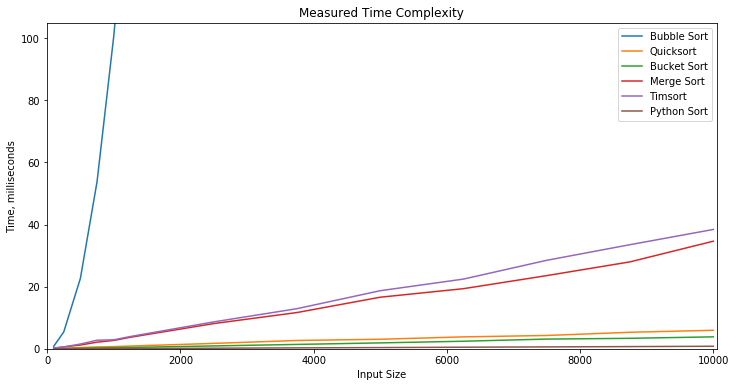

In [21]:
import matplotlib.pyplot as plt 
#import seaborn as sns
#import scipy.stats as stats

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

### Results visualisation

import matplotlib.pyplot as plt 
#import seaborn as sns
#import scipy.stats as stats

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

# Setting up the plotting output
plt.plot(data['Size'], data['Bubble'], label='Bubble Sort')
plt.plot(data['Size'], data['Quick'],  label='Quicksort')
plt.plot(data['Size'], data['Bucket'], label='Bucket Sort')
plt.plot(data['Size'], data['Merge'],  label='Merge Sort')
plt.plot(data['Size'], data['Tim'],    label='Timsort')
plt.plot(data['Size'], data['Python'], label='Python Sort')

# Adding title, labels and legend
plt.title("Measured Time Complexity")
plt.xlabel("Input Size") 
plt.ylabel("Time, milliseconds")
plt.legend()

# set axis ranges
plt.xlim(0,10050)
plt.ylim(0,105)

# set size of the plot in inches (default dpi=100)
plt.gcf().set_size_inches(12, 6)

# plot the graph
plt.show()

___
## 4. Findings / Discussion

From the above it is clear that the Bubble Sort is by far the least efficient of all tested. Although the Bubble sort algorithm is relatively simple, its application for larger input sizes becomes hardly justified. From the chart, it appears the curve takes the shape of a quadratic function. This corresponds to the expected O(n2) time complexity of the algorithm.

he next two least efficient algorithms are the Timsort and the Merge sort. The times measured for these two are very similar, although Merge Sort is more efficient. The shape of the curves are difficult to identify, but they appear to follow a “wide” O(n logn) shape, which are the expected results for the algorithms. It is interesting, however, when comparing the above tested Timsort implementation against Python’s built-in sorting algorithm, sorted(), which also uses the Timsort algorithm and is much more efficient. This direct comparison demonstrates the importance of actual implementation of an algorithm. Also, it is worth noting that the sorted() method was originally written in C language ([source code](https://github.com/python/cpython/blob/master/Python/bltinmodule.c#L2222)). 

The Quick sort is significantly better than the other three already discussed. The plot of their efficiency is similar. It is interesting to see the curve of the Quicksort in relation to the Merge sort one. They both are classified in the literature (see the algorithms description above) as O(n logn) time complexity. However, the former (Quick) outperforms the later (Merge).

The Bucket sort is the last of the tested algorithms. It showed the best performance of all the tested algorithms (excluding sorted(), which was added as reference only), although only marginally better than the Quicksort. This algorithm is the only one from the selected for benchmarking that is classified as non-comparison based. Its supposed time complexity is of O(nk) degree, where k is the number of the buckets. The algorithm performance seems to be accurately captured in this benchmarking.


___
## References

#### Lectures materials 
* https://learnonline.gmit.ie/course/view.php?id=1696
* https://www.comp.nus.edu.sg/~stevenha/cs1020e/lectures/L10%20-%20Sorting.pdf
* https://www.cs.princeton.edu/~rs/AlgsDS07/04Sorting.pdf

#### Books
* T. H. Cormen et. al, Introduction to Algorithms, 2009 (https://en.wikipedia.org/wiki/Introduction_to_Algorithms)
* D. E. Knuth, The Art of Computer Programming, Vol. 3: Sorting and Searching, 1998, (https://en.wikipedia.org/wiki/The_Art_of_Computer_Programming)
* R. Sedgewick, K. Wayne, Algorithms, 2011 (https://algs4.cs.princeton.edu/home/)
* G. T. Heineman et al, Algorithms in a Nutshell, 2016, (https://www.amazon.com/Algorithms-Nutshell-Practical-George-Heineman/dp/1491948922)
* B. Miller and D. Ranum, Problem Solving with Algorithms and Data Structures using Python, 2005 (https://runestone.academy/runestone/books/published/pythonds/index.html)

#### Papers
* O. Kaser, Analyzing Code with Thetha, Oh and Omega, 2017, http://www2.unb.ca/~owen/courses/2383-2018/using-big-theta.pdf
* El Abbadi & A Kareem,  NK-Sorting Algorithm, 2011, https://www.iasj.net/iasj?func=fulltext&aId=36934  
* A. C. Dalal, Searching and Sorting Algorithms, 2004, http://www.cs.carleton.edu/faculty/adalal/teaching/f04/117/notes/searchSort.pdf
* N. Auger et. al, On the Worst-Case Complexity of TimSort, 2018, https://drops.dagstuhl.de/opus/volltexte/2018/9467/pdf/LIPIcs-ESA-2018-4.pdf


#### Websites (visited in April 2020)
* https://docs.python.org/3.8/howto/sorting.html
* https://en.wikipedia.org/wiki/Sorting_algorithm
* https://en.wikipedia.org/wiki/Asymptotic_analysis
* https://en.wikipedia.org/wiki/Big_O_notation
* https://www.hackerearth.com/practice/algorithms/sorting/
* https://www.khanacademy.org/computing/computer-science/algorithms/
* https://bugs.python.org/file4451/timsort.txt
* https://hackernoon.com/timsort-the-fastest-sorting-algorithm-youve-never-heard-of-36b28417f399
* https://guide.freecodecamp.org/algorithms/
* https://medium.com/@rscheiwe/the-case-for-timsort-349d5ce1e414
* https://hackernoon.com/timsort-the-fastest-sorting-algorithm-youve-never-heard-of-36b28417f399
* http://www.programming-algorithms.net/article/41160/Bucket-sort
* https://www.quora.com/What-is-sorting-2
* https://www.bigocheatsheet.com/
* https://www.khanacademy.org/computing/computer-science/algorithms/asymptotic-notation/a/big-o-notation
* http://www.programming-algorithms.net/article/41160/Bucket-sort
* https://www.hackerearth.com/practice/algorithms/sorting/merge-sort/tutorial/
* https://en.wikipedia.org/wiki/Timsort
* https://bugs.python.org/file4451/timsort.txt
* https://medium.com/@rscheiwe/the-case-for-timsort-349d5ce1e414
* https://medium.com/@george.seif94/this-is-the-fastest-sorting-algorithm-ever-b5cee86b559c
* https://hackernoon.com/timsort-the-fastest-sorting-algorithm-youve-never-heard-of-36b28417f399
* https://github.com/python/cpython/blob/master/Python/bltinmodule.c#L2222




___

Andrzej Kocielski, 2020